In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
import seaborn as sb
from platform import python_version

from sklearn.metrics import mean_squared_error as mse

print(python_version())
print(np.version.version)
print(pd.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(sb.__version__)

3.7.15
1.21.6
1.3.5
3.2.2
1.0.2
0.11.2


**Reading the original dataframe provided by NIST for superheated R134a**

In [5]:
o_df=pd.read_excel('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated.xlsx',index_col=None)
o_df

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K),Phase
0,-36.935,60,3.2131,0.311230,357.27,375.94,1.7601,0.66030,0.75848,144.150,54.2800,0.000009,0.008423,vapor
1,-30.000,60,3.1105,0.321490,361.93,381.22,1.7821,0.66810,0.76350,146.420,47.1420,0.000010,0.008977,vapor
2,-20.000,60,2.9755,0.336080,368.74,388.91,1.8131,0.68226,0.77492,149.580,39.5520,0.000010,0.009776,vapor
3,-10.000,60,2.8532,0.350490,375.70,396.73,1.8433,0.69805,0.78879,152.630,33.8770,0.000010,0.010576,vapor
4,0.000,60,2.7415,0.364760,382.80,404.69,1.8730,0.71457,0.80387,155.570,29.4110,0.000011,0.011376,vapor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,100.340,4000,390.2300,0.002563,395.13,405.38,1.6046,1.22610,37.63500,93.112,14.8720,0.000026,0.066017,vapor
324,110.000,4000,234.0400,0.004273,429.17,446.26,1.7131,1.06960,2.18670,119.410,13.3530,0.000020,0.029091,vapor
325,120.000,4000,200.2800,0.004993,445.13,465.10,1.7616,1.04140,1.68410,132.010,11.3920,0.000019,0.026830,vapor
326,130.000,4000,180.2200,0.005549,458.71,480.90,1.8013,1.03270,1.49920,141.460,9.9709,0.000019,0.026203,vapor


In [6]:
o_df.describe()

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,79.533913,993.445122,44.445902,0.093170,437.823476,463.222317,1.887195,0.889670,1.222589,160.958177,15.523549,0.000014,0.018841
std,43.744292,1052.226134,56.406569,0.111925,35.309196,39.026035,0.131198,0.092147,2.073488,18.126935,7.907632,0.000002,0.005166
min,-36.935000,60.000000,1.788700,0.002563,357.270000,375.940000,1.604600,0.660300,0.758480,93.112000,7.389700,0.000009,0.008423
25%,50.000000,200.000000,8.102850,0.016960,410.545000,430.440000,1.781200,0.826327,0.936295,149.410000,9.677050,0.000013,0.015452
50%,90.000000,550.000000,20.748000,0.048199,438.040000,463.595000,1.871850,0.898065,1.016150,162.610000,13.172500,0.000014,0.018916
75%,120.000000,1400.000000,58.963750,0.123418,467.520000,495.460000,1.978475,0.949192,1.129375,175.000000,18.701500,0.000016,0.021826
max,140.000000,4000.000000,390.230000,0.559070,499.470000,533.010000,2.249100,1.226100,37.635000,190.680000,54.280000,0.000026,0.066017


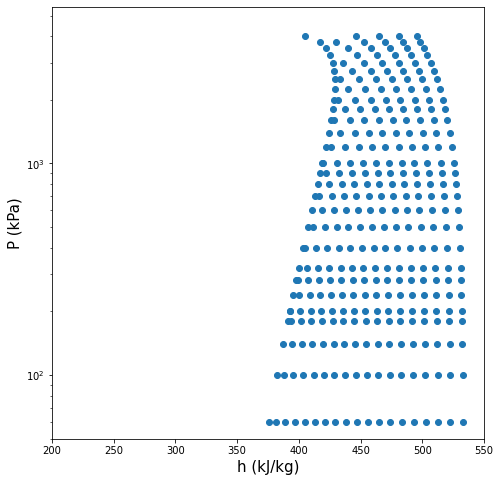

In [7]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([200, 550]);
ax.scatter(x=o_df['h (kJ/kg)'].values,y=o_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

#Augmenting the data first for pressure
As you know the superheated data consists of a set of small tables  with constant pressure with a little bit far apart, so the augmentation done here is to generate some new small tables for new different constant pressure values for each table. The temperatures for new tables ranges from the lower limit saturation T which will be calculated by interpolation and the upper limit is the max T in the previous sub table, Why? beside it's the criterion ready made tables from NIST, it's the most safe we because if we take the max of the next sub table we maybe exceed the natural upper limit temperature of the refrigerant R134a at that new point we which interplote.


**Finally:** the resulting table is the same to the original data with a new sub tables.

In [8]:
o_df.columns

Index(['T ©', 'P (kPa)', 'Density (kg/m^3)', 'v (m^3/kg)', 'u (kJ/kg)',
       'h (kJ/kg)', 's (kJ/kg.K)', 'Cv (kJ/kg.K)', 'Cp (kJ/kg.K)',
       'Sound Spd. (m/s)', 'Joule-Thomson (K/MPa)', 'Viscosity (Pa.s)',
       'Therm. Cond. (W/m.K)', 'Phase'],
      dtype='object')

In [9]:
step=.2
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}



#The o_df is the original data but in a form of tidy data, so all sub tables 
#exist here but on top of each other. Hence the fisrt iteration is over it by 
#pressure to take one subtable at a time
for i,P1 in enumerate(o_df['P (kPa)'].unique()):
  if (P1 ==o_df['P (kPa)'].unique().max()): break 
  #Break when reaching the end of the o_df because there is no sub tables else

  else:
    P2=o_df['P (kPa)'].unique()[i+1] #Here we take the next sub table to interpolate with

    #Reset index is important because it will be used to handle it, while when 
    #copying it the index was the old one for that portion
    df1=o_df[o_df['P (kPa)']==P1]
    df2=o_df[o_df['P (kPa)']==P2]
    print("=============================================")
    print("main table P1= {} and P2= {}".format(P1,P2)) #Indecation


    #Now the iteration for an intermediate values of pressure 
    #between the two values of the two sub tables
    #The step here is approximatly by 500 Pascal
    for P in np.linspace(P1,P2,num=int(((P2-P1)/step))):
    
      #The sturation temp for the sub tables table
      T1_sat=df1['T ©'].values.min()
      T2_sat=df2['T ©'].values.min()
      
      #The sturation temp for the new sub table table will be generated
      T_sat= (T2_sat-((P2-P)/(P2-P1)*(T2_sat-T1_sat)))
      #The max temp interpreted above in the written text
      T_max=df1['T ©'].max()
      print("For P {} the sat {} and the max {}".format(P,T_sat,T_max))

      for i,T in enumerate(df2['T ©'].values):
        if (i==0): continue
        #elif (T>T_max): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)
        elif(T not in (df1['T ©'].values) ): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)

      for i,T in enumerate(df1['T ©'].values):
        if(i==0): continue
        #elif(T<T_sat): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)
        elif((T not in (df2['T ©'].values)) | (T == df2['T ©'].min()) ): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)

      #print(len(df1)==len(df2))

      T_col=np.array(df1['T ©'].values)
      T_col[0]=T_sat

      P_col=np.array(df1['T ©'].values)
      P_col.fill(P)

      v_col=(((np.array(df2['v (m^3/kg)'])-np.array(df1['v (m^3/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['v (m^3/kg)'])
      u_col=(((np.array(df2['u (kJ/kg)'])-np.array(df1['u (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['u (kJ/kg)'])
      h_col=(((np.array(df2['h (kJ/kg)'])-np.array(df1['h (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['h (kJ/kg)'])
      s_col=(((np.array(df2['s (kJ/kg.K)'])-np.array(df1['s (kJ/kg.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['s (kJ/kg.K)'])
      speed_col=(((np.array(df2['Sound Spd. (m/s)'])-np.array(df1['Sound Spd. (m/s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Sound Spd. (m/s)'])
      visc_col=(((np.array(df2['Viscosity (Pa.s)'])-np.array(df1['Viscosity (Pa.s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Viscosity (Pa.s)'])
      cond_col=(((np.array(df2['Therm. Cond. (W/m.K)'])-np.array(df1['Therm. Cond. (W/m.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Therm. Cond. (W/m.K)'])

      generated['T ©'].extend(T_col)
      generated['P (kPa)'].extend(P_col)
      generated['v (m^3/kg)'].extend(v_col)
      generated['u (kJ/kg)'].extend(u_col)
      generated['h (kJ/kg)'].extend(h_col)
      generated['s (kJ/kg.K)'].extend(s_col)
      generated['Viscosity (Pa.s)'].extend(visc_col)
      generated['Sound Spd. (m/s)'].extend(speed_col)
      generated['Therm. Cond. (W/m.K)'].extend(cond_col)
      print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],v_col[0],u_col[0],h_col[0],s_col[0]))
      #display(pd.DataFrame(columns))

df_part1=pd.DataFrame(generated)
generated=0
df_part1


main table P1= 60 and P2= 100
For P 60.0 the sat -36.935 and the max 140.0
Appended P 60.0 ,T -36.935, v 0.31123, u 357.27, h 375.94, s1.7601
For P 60.20100502512563 the sat -36.88186432160804 and the max 140.0
Appended P 60.20100502512563 ,T -36.88186432160804, v 0.3106336683417085, u 357.3005025125628, h 375.9734673366834, s1.7600366834170855
For P 60.402010050251256 the sat -36.82872864321608 and the max 140.0
Appended P 60.402010050251256 ,T -36.82872864321608, v 0.3100373366834171, u 357.3310050251256, h 376.00693467336686, s1.7599733668341708
For P 60.60301507537689 the sat -36.77559296482412 and the max 140.0
Appended P 60.60301507537689 ,T -36.77559296482412, v 0.3094410050251256, u 357.3615075376884, h 376.04040201005023, s1.7599100502512564
For P 60.80402010050251 the sat -36.72245728643216 and the max 140.0
Appended P 60.80402010050251 ,T -36.72245728643216, v 0.3088446733668342, u 357.39201005025126, h 376.07386934673366, s1.7598467336683417
For P 61.005025125628144 the sat

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Streaming output truncated to the last 5000 lines.
For P 3500.2001601281027 the sat 93.7307357886309 and the max 140.0
Appended P 3500.2001601281027 ,T 93.7307357886309, v 0.0039674017614091265, u 408.3369655724579, h 422.2258847077662, s1.6543868694955965
For P 3500.400320256205 the sat 93.7334715772618 and the max 140.0
Appended P 3500.400320256205 ,T 93.7334715772618, v 0.003966903522818255, u 408.33393114491594, h 422.22176941553244, s1.654373738991193
For P 3500.6004803843075 the sat 93.73620736589271 and the max 140.0
Appended P 3500.6004803843075 ,T 93.73620736589271, v 0.003966405284227381, u 408.3308967173739, h 422.21765412329864, s1.6543606084867895
For P 3500.80064051241 the sat 93.73894315452361 and the max 140.0
Appended P 3500.80064051241 ,T 93.73894315452361, v 0.003965907045636509, u 408.32786228983184, h 422.21353883106485, s1.654347477982386
For P 3501.0008006405124 the sat 93.74167894315451 and the max 140.0
Appended P 3501.0008006405124 ,T 93.74167894315451, v 0.00

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935,60.0,0.311230,357.27,375.94,1.7601,144.150,0.000009,0.008423
1,-20.000,60.0,0.336080,368.74,388.91,1.8131,149.580,0.000010,0.009776
2,-10.000,60.0,0.350490,375.70,396.73,1.8433,152.630,0.000010,0.010576
3,0.000,60.0,0.364760,382.80,404.69,1.8730,155.570,0.000011,0.011376
4,10.000,60.0,0.378930,390.07,412.81,1.9022,158.430,0.000011,0.012176
...,...,...,...,...,...,...,...,...,...
180745,100.340,4000.0,0.002563,395.13,405.38,1.6046,93.112,0.000026,0.066017
180746,110.000,4000.0,0.004273,429.17,446.26,1.7131,119.410,0.000020,0.029091
180747,120.000,4000.0,0.004993,445.13,465.10,1.7616,132.010,0.000019,0.026830
180748,130.000,4000.0,0.005549,458.71,480.90,1.8013,141.460,0.000019,0.026203


In [10]:
df_part1=df_part1.drop_duplicates(subset=['T ©','P (kPa)'])

In [11]:
df_part1.describe()

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,180460.000000,180460.000000,180460.000000,180460.000000,180460.000000,180460.000000,180460.000000,180460.000000,180460.000000
mean,93.759547,1650.798016,0.040182,443.602049,468.128997,1.846073,154.786751,0.000015,0.020837
std,35.443196,1118.002694,0.063468,30.177577,33.753292,0.110489,19.190216,0.000002,0.004937
min,-36.935000,60.000000,0.002563,357.270000,375.940000,1.604600,93.112000,0.000009,0.008423
25%,70.000000,665.731463,0.009057,419.168581,440.567845,1.761490,143.570996,0.000014,0.018047
50%,100.000000,1478.878879,0.017160,444.852432,469.289690,1.837490,156.423180,0.000015,0.021046
75%,120.000000,2531.425140,0.039983,468.811134,496.270473,1.915674,169.122844,0.000017,0.023075
max,140.000000,4000.000000,0.559070,499.470000,533.010000,2.249100,190.680000,0.000026,0.066017


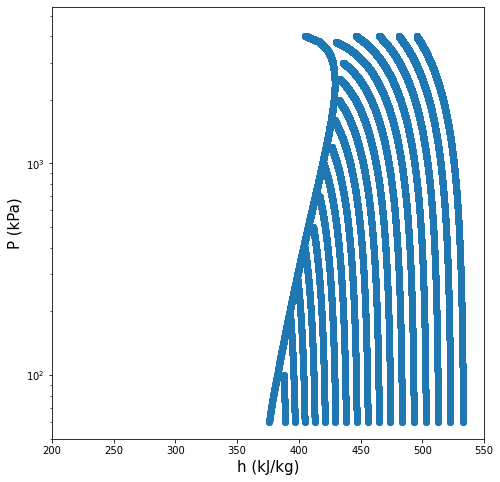

In [12]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([200, 550]);
ax.scatter(x=df_part1['h (kJ/kg)'].values,y=df_part1['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

In [13]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_{}_for_P_part1.csv'.format(step)
  
# saving the excel
df_part1.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_{}_for_P_part1.csv'.format(step)\n  \n# saving the excel\ndf_part1.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [14]:
'''df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.5_for_P_part1.csv')

df_part1'''

"df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.5_for_P_part1.csv')\n\ndf_part1"

#Augmenting the data second with various temperatures for each sub table
The generated dataframe above contains tables what we can call clusters cover the entire range of pressure with a little bit far part temperature values so now we will do interpolation for each cluster to generate more temperature values between the two end, first is the saturation and the second is the maximum temperatures by interpolating new points of T between each two consequent temperature points with a constant arbitrary valued step.

**Finally:**the resulting table is quite same to the above one, here the number of clusters is the same to the above but contains more row than it because of generating new ones.


In [15]:
df_part1.duplicated(subset=['T ©','P (kPa)']).sum()

0

In [16]:
deg=.25
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}


#Using Ps for interpolating is because of it is the unique property from cluster to another.
for P in (df_part1['P (kPa)'].unique()):
    
    #The below df is a cluster copy from the big data frame that was been generated.
    df=df_part1[df_part1['P (kPa)']==P]
    

    #Now we iterate over the cluster with temperature T_upper to interpolate with
    #and i to get the next temperature from the next row T_lower
    for i,T_upper in enumerate(df['T ©'].unique()):
        if T_upper==df['T ©'].max():
          generated['T ©'].append(T_upper)
          generated['P (kPa)'].append(P)
          generated['v (m^3/kg)'].append(float(df[df['T ©']==T_upper]['v (m^3/kg)'].values))
          generated['u (kJ/kg)'].append(float(df[df['T ©']==T_upper]['u (kJ/kg)'].values))
          generated['h (kJ/kg)'].append(float(df[df['T ©']==T_upper]['h (kJ/kg)'].values))
          generated['s (kJ/kg.K)'].append(float(df[df['T ©']==T_upper]['s (kJ/kg.K)'].values))
          generated['Sound Spd. (m/s)'].append(float(df[df['T ©']==T_upper]['Sound Spd. (m/s)'].values))
          generated['Viscosity (Pa.s)'].append(float(df[df['T ©']==T_upper]['Viscosity (Pa.s)'].values))
          generated['Therm. Cond. (W/m.K)'].append(float(df[df['T ©']==T_upper]['Therm. Cond. (W/m.K)'].values))
          print('Appended the original data!')
          print("End of df")
          break #Break when reaching the end of cluster because there is not T_lower else

        else:
          T_lower=(df.iloc[i+1]['T ©'])


        #Now iterpolation for an intermediate values of T between T_upper and T_lower
        #The step here is approximatly .3 degree celsius 
        T_col= np.linspace(T_upper,T_lower,num=int(np.abs(np.abs(T_lower)-np.abs(T_upper))/deg),endpoint=False)
        P_col=np.full(shape=T_col.shape,fill_value=P)
        if (len(T_col)==0):continue

        upper_row=np.array(df[df['T ©']==T_upper][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)','Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        lower_row=np.array(df[df['T ©']==T_lower][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)', 'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        props=((np.tile(((lower_row-upper_row)/(T_lower-T_upper)), (T_col.shape[0], 1)))*(T_col-T_upper)[:,None])+upper_row        

        generated['T ©'].extend(T_col)
        generated['P (kPa)'].extend(P_col)
        generated['v (m^3/kg)'].extend(props[:,0])
        generated['u (kJ/kg)'].extend(props[:,1])
        generated['h (kJ/kg)'].extend(props[:,2])
        generated['s (kJ/kg.K)'].extend(props[:,3])
        generated['Sound Spd. (m/s)'].extend(props[:,4])
        generated['Viscosity (Pa.s)'].extend(props[:,5])
        generated['Therm. Cond. (W/m.K)'].extend(props[:,6])

        print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],props[:,0][0],props[:,1][0],props[:,2][0],props[:,3][0]))
        #display(pd.DataFrame(columns))
generated_df=pd.DataFrame(generated)
generated=0
generated_df

Streaming output truncated to the last 5000 lines.
Appended the original data!
End of df
Appended P 3833.466773418735 ,T 98.21170536429143, v 0.0030841820656525216, u 401.4049719775821, h 413.18041633306643, s1.626848839071257
Appended P 3833.466773418735 ,T 110.0, v 0.0047176435548438745, u 432.6205684547638, h 450.66313851080866, s1.7265558847077662
Appended P 3833.466773418735 ,T 120.0, v 0.005397575740592474, u 447.4881104883907, h 468.1442273819055, s1.7715919935948758
Appended P 3833.466773418735 ,T 130.0, v 0.005942684387510008, u 460.5685108086469, h 483.31806244995994, s1.8096932746196959
Appended the original data!
End of df
Appended P 3833.6669335468373 ,T 98.21426341072858, v 0.0030835551641313053, u 401.39742994395516, h 413.1710408326661, s1.6268220976781425
Appended P 3833.6669335468373 ,T 110.0, v 0.004717108887109688, u 432.61642113690954, h 450.65784627702163, s1.7265397117694157
Appended P 3833.6669335468373 ,T 120.0, v 0.005397089351481185, u 447.4852762209768, h 46

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.311230,357.270000,375.940000,1.760100,144.150000,0.000009,0.008423
1,-36.682239,60.0,0.311601,357.441194,376.133582,1.760891,144.231045,0.000009,0.008443
2,-36.429478,60.0,0.311972,357.612388,376.327164,1.761682,144.312090,0.000009,0.008464
3,-36.176716,60.0,0.312343,357.783582,376.520746,1.762473,144.393134,0.000009,0.008484
4,-35.923955,60.0,0.312714,357.954776,376.714328,1.763264,144.474179,0.000009,0.008504
...,...,...,...,...,...,...,...,...,...
6271456,139.000000,4000.0,0.005977,470.023000,493.923000,1.833250,148.480000,0.000019,0.026163
6271457,139.250000,4000.0,0.005989,470.337250,494.284750,1.834137,148.675000,0.000019,0.026161
6271458,139.500000,4000.0,0.006001,470.651500,494.646500,1.835025,148.870000,0.000019,0.026160
6271459,139.750000,4000.0,0.006013,470.965750,495.008250,1.835913,149.065000,0.000019,0.026159


In [17]:
generated_df.drop_duplicates()

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.311230,357.270000,375.940000,1.760100,144.150000,0.000009,0.008423
1,-36.682239,60.0,0.311601,357.441194,376.133582,1.760891,144.231045,0.000009,0.008443
2,-36.429478,60.0,0.311972,357.612388,376.327164,1.761682,144.312090,0.000009,0.008464
3,-36.176716,60.0,0.312343,357.783582,376.520746,1.762473,144.393134,0.000009,0.008484
4,-35.923955,60.0,0.312714,357.954776,376.714328,1.763264,144.474179,0.000009,0.008504
...,...,...,...,...,...,...,...,...,...
6271456,139.000000,4000.0,0.005977,470.023000,493.923000,1.833250,148.480000,0.000019,0.026163
6271457,139.250000,4000.0,0.005989,470.337250,494.284750,1.834137,148.675000,0.000019,0.026161
6271458,139.500000,4000.0,0.006001,470.651500,494.646500,1.835025,148.870000,0.000019,0.026160
6271459,139.750000,4000.0,0.006013,470.965750,495.008250,1.835913,149.065000,0.000019,0.026159


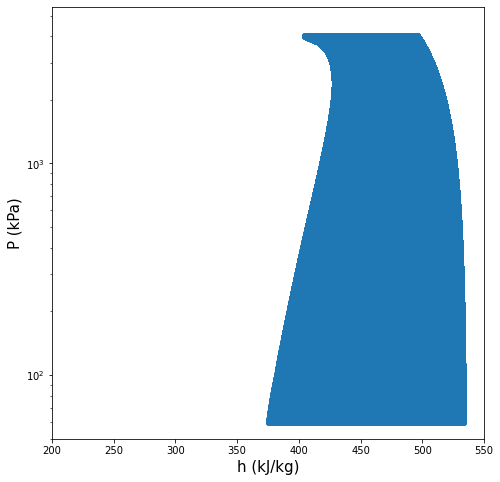

In [18]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([50, 5500]);
plt.xlim([200, 550]);
ax.scatter(x=generated_df['h (kJ/kg)'].values,y=generated_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

In [19]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)
  
# saving the excel
generated_df.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)\n  \n# saving the excel\ngenerated_df.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [20]:
'''generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.5_for_P_0.5_for_T.csv')

generated_df'''

"generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.5_for_P_0.5_for_T.csv')\n\ngenerated_df"

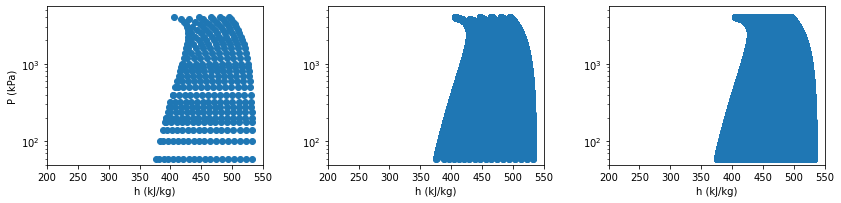

In [21]:
fig=plt.figure();

for i in range(0,3):
  if i == 0: df=o_df
  elif i==1: df=df_part1
  elif i==2: df=generated_df
  ax=fig.add_axes([(i*.65),0,.5,.55]);
  ax.set_yscale('log');
  plt.ylim([50, 5500]);
  plt.xlim([200, 550]);
  ax.scatter(x=df['h (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
  if i ==0 :ax.set_ylabel('P (kPa)',fontsize=10);
  ax.set_xlabel('h (kJ/kg)',fontsize=10);

#Training the models with various Ks

In [22]:
superheated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.5_for_P_0.5_for_T.csv')
superheated_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.311230,357.270000,375.940000,1.760100,144.150000,0.000009,0.008423
1,-36.421818,60.0,0.311983,357.617576,376.333030,1.761706,144.314545,0.000009,0.008464
2,-35.908636,60.0,0.312736,357.965152,376.726061,1.763312,144.479091,0.000009,0.008505
3,-35.395455,60.0,0.313489,358.312727,377.119091,1.764918,144.643636,0.000009,0.008546
4,-34.882273,60.0,0.314242,358.660303,377.512121,1.766524,144.808182,0.000009,0.008587
...,...,...,...,...,...,...,...,...,...
1253073,138.000000,4000.0,0.005929,468.766000,492.476000,1.829700,147.700000,0.000019,0.026167
1253074,138.500000,4000.0,0.005953,469.394500,493.199500,1.831475,148.090000,0.000019,0.026165
1253075,139.000000,4000.0,0.005977,470.023000,493.923000,1.833250,148.480000,0.000019,0.026163
1253076,139.500000,4000.0,0.006001,470.651500,494.646500,1.835025,148.870000,0.000019,0.026160


In [23]:
superheated_valid_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_superheated_augmented_0.2_for_P_0.25_for_T.csv')

superheated_valid_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-36.935000,60.0,0.311230,357.270000,375.940000,1.760100,144.150000,0.000009,0.008423
1,-36.682239,60.0,0.311601,357.441194,376.133582,1.760891,144.231045,0.000009,0.008443
2,-36.429478,60.0,0.311972,357.612388,376.327164,1.761682,144.312090,0.000009,0.008464
3,-36.176716,60.0,0.312343,357.783582,376.520746,1.762473,144.393134,0.000009,0.008484
4,-35.923955,60.0,0.312714,357.954776,376.714328,1.763264,144.474179,0.000009,0.008504
...,...,...,...,...,...,...,...,...,...
6271456,139.000000,4000.0,0.005977,470.023000,493.923000,1.833250,148.480000,0.000019,0.026163
6271457,139.250000,4000.0,0.005989,470.337250,494.284750,1.834137,148.675000,0.000019,0.026161
6271458,139.500000,4000.0,0.006001,470.651500,494.646500,1.835025,148.870000,0.000019,0.026160
6271459,139.750000,4000.0,0.006013,470.965750,495.008250,1.835913,149.065000,0.000019,0.026159


In [24]:
superheated_X_train= superheated_X_test= superheated_df[['T ©', 'P (kPa)']]
superheated_y_train= superheated_y_test = superheated_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']]



len(superheated_X_test)

1253078

In [25]:
a, superheated_valid_X, c, superheated_valid_y = train_test_split(superheated_valid_df[['T ©', 'P (kPa)']],
                                                    superheated_valid_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']],
                                                    test_size=.005,
                                                    random_state=40,
                                                    shuffle=True)




In [26]:
for K in range(1,6):

  superheated_model=KNR(n_neighbors=K,weights='distance',p=1)
  superheated_model.fit(superheated_X_train, superheated_y_train)
  print("For K = {}, The error is {} %.".format(K,((np.abs((superheated_model.predict(superheated_X_test)-superheated_y_test)/superheated_y_test)).max().max())*100))

For K = 1, The error is 0.0 %.
For K = 2, The error is 0.0 %.
For K = 3, The error is 0.0 %.
For K = 4, The error is 0.0 %.
For K = 5, The error is 0.0 %.


In [27]:
for K in range(1,11):

  superheated_model=KNR(n_neighbors=K,weights='distance',p=1)
  superheated_model.fit(superheated_X_train, superheated_y_train)
  print("For K = {}, The error is {} %.".format(K,((np.abs((superheated_model.predict(superheated_valid_X)-superheated_valid_y)/superheated_valid_y)).max().max())*100))

For K = 1, The error is 3.0382677937064826 %.
For K = 2, The error is 1.8990709154971772 %.
For K = 3, The error is 2.057242642121156 %.
For K = 4, The error is 1.6448711613578997 %.
For K = 5, The error is 1.4597033760808855 %.
For K = 6, The error is 1.3673396470765917 %.
For K = 7, The error is 1.4939920134691276 %.
For K = 8, The error is 1.626096084218619 %.
For K = 9, The error is 1.7755070578644734 %.
For K = 10, The error is 1.8843214071730094 %.


#Analyzing the best model

In [28]:
K=6
superheated_model=KNR(n_neighbors=K,weights='distance',p=1)
superheated_model.fit(superheated_X_train, superheated_y_train)
print("For K = {}, The validation maximum percent error is {} %.".format(K,(np.abs((superheated_model.predict(superheated_valid_X)-superheated_valid_y)/superheated_valid_y).max().max())*100))
print("For K = {}, The validation minimum percent error is {} %.".format(K,(np.abs((superheated_model.predict(superheated_valid_X)-superheated_valid_y)/superheated_valid_y).min().min())*100))
start=time.time()
superheated_model.predict(superheated_valid_X)
print("The elapsed time for predicting {} entry is {} seconds.".format(len(superheated_valid_X),(time.time()-start)))

For K = 6, The validation maximum percent error is 1.3673396470765917 %.
For K = 6, The validation minimum percent error is 0.0 %.
The elapsed time for predicting 31358 entry is 0.21227240562438965 seconds.


In [29]:
superheated_error_df= ((superheated_model.predict(superheated_valid_X)-superheated_valid_y)/superheated_valid_y)*100
superheated_error_df.describe()

,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,31358.000000,31358.000000,31358.000000,31358.000000,31358.000000,31358.000000,31358.000000
mean,-0.000788,-0.000531,-0.000556,-0.000373,-0.000539,-0.000702,-0.001232
std,0.040892,0.008918,0.009944,0.007054,0.023211,0.014454,0.038516
min,-0.607911,-0.091642,-0.107544,-0.074099,-0.329325,-0.320702,-1.367340
25%,-0.010985,-0.004452,-0.004722,-0.003094,-0.005088,-0.003748,-0.004657
50%,-0.000897,-0.000034,-0.000046,-0.000099,-0.000202,-0.000028,-0.000034
75%,0.006634,0.000205,0.000253,0.000583,0.000882,0.000479,0.000844
max,0.685571,0.111047,0.133246,0.100078,0.542649,0.289732,0.819326


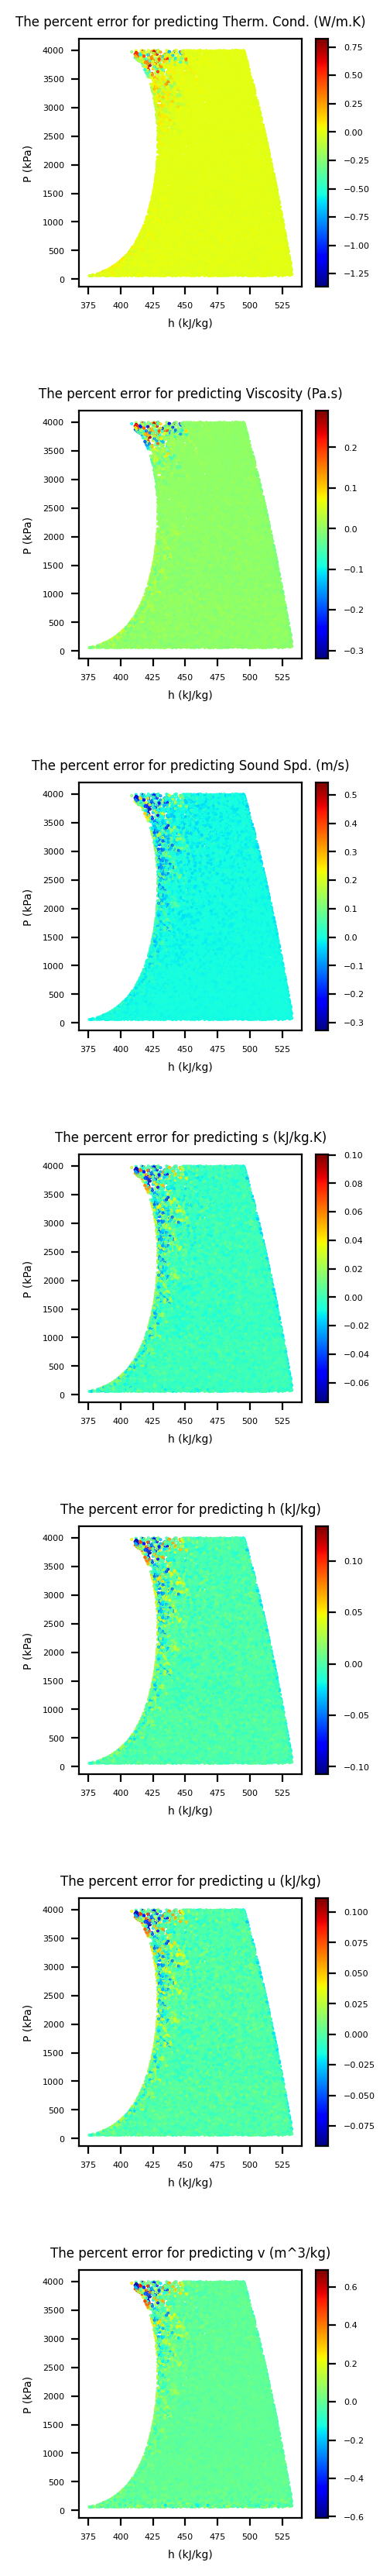

In [30]:
fig=plt.figure(dpi=200);


for i,col in enumerate(superheated_error_df.columns):

  plt.rc('xtick', labelsize=4);
  plt.rc('ytick', labelsize=4);
  ax=fig.add_axes([0,(i*.6),.3,.4]);
  x=ax.scatter(superheated_valid_y['h (kJ/kg)'], superheated_valid_X['P (kPa)'], c=superheated_error_df[col],cmap="jet", s=.2);
  ax.set_ylabel('P (kPa)',fontsize=5)
  plt.colorbar(x);
  plt.title('The percent error for predicting {}'.format(col),fontsize=6);
  ax.set_xlabel('h (kJ/kg)',fontsize=5);


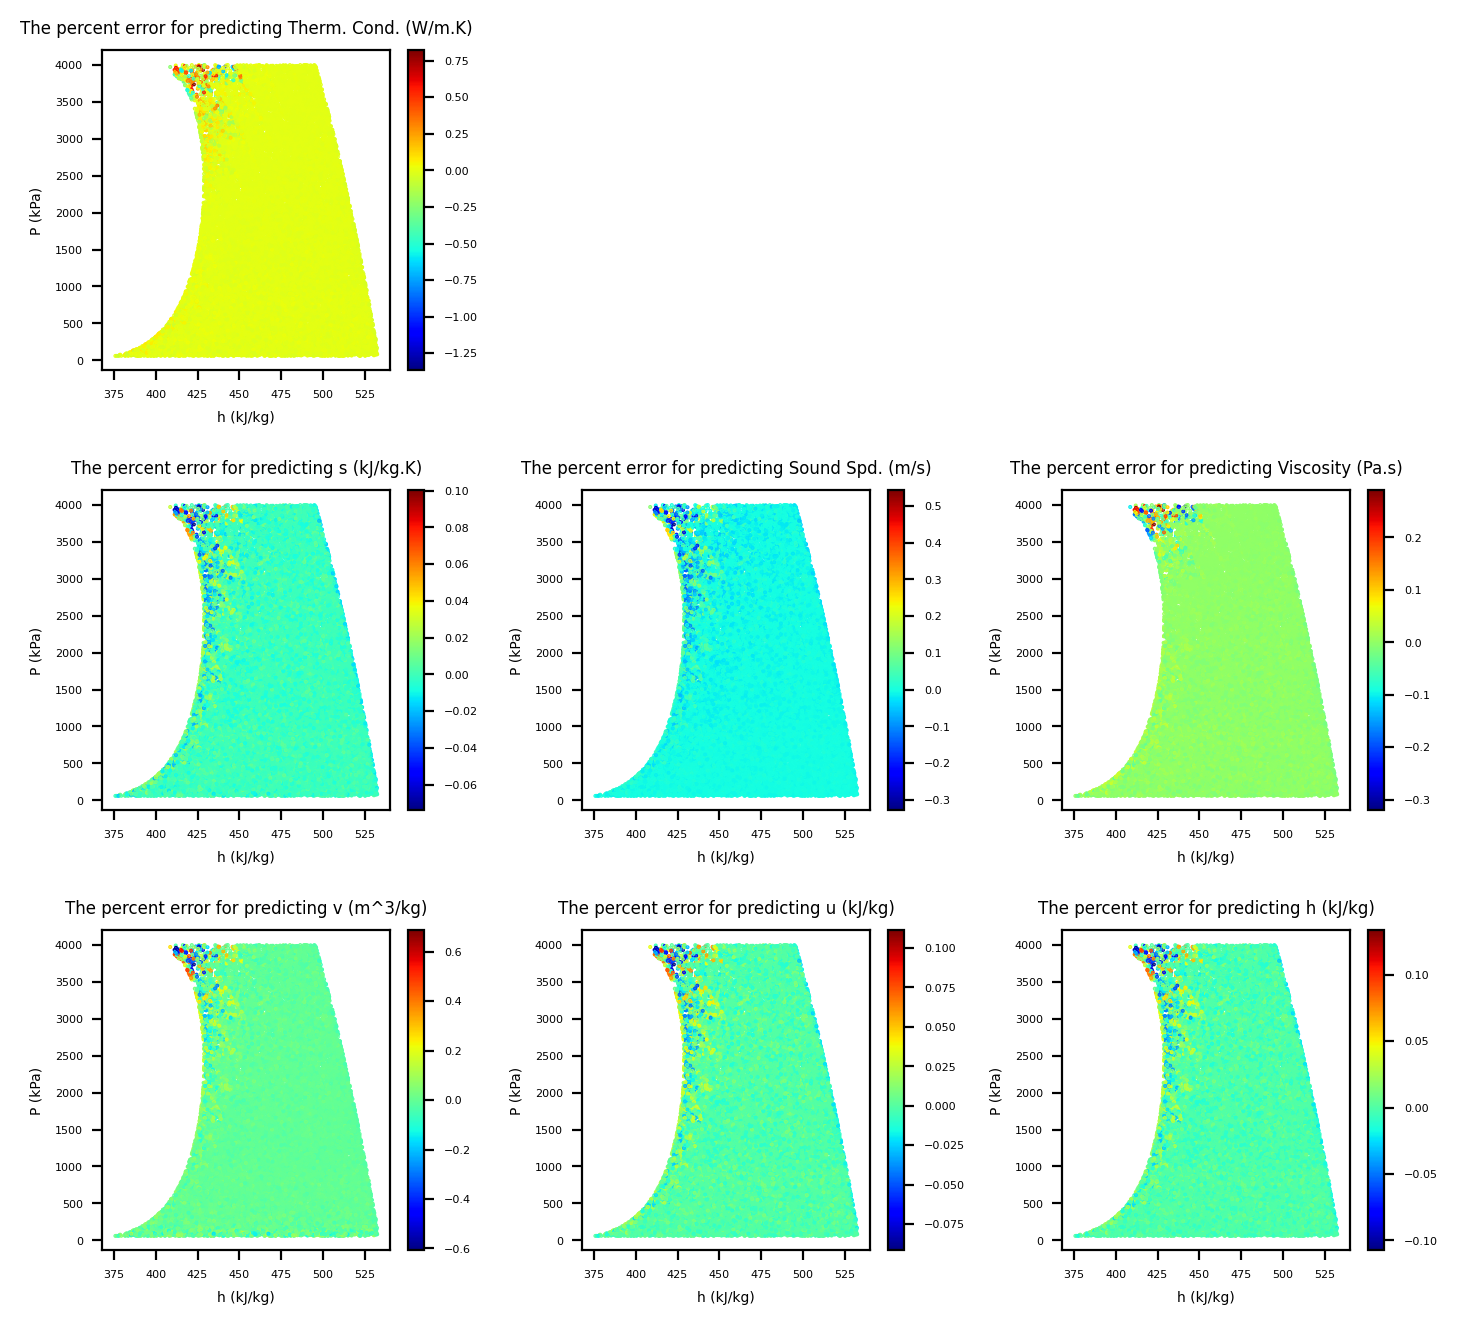

In [33]:
fig=plt.figure(dpi=200);


for i in range(0,4):
  for k in range(0,3):
    if ((k+(i*3))>(len(superheated_error_df.columns)-1)):break
    col=superheated_error_df.columns[(k+(i*3))]
    plt.rc('xtick', labelsize=4);
    plt.rc('ytick', labelsize=4);
    ax=fig.add_axes([(k*.4),(i*.55),.3,.4]);
    x=ax.scatter(superheated_valid_y['h (kJ/kg)'], superheated_valid_X['P (kPa)'], c=superheated_error_df[col],cmap="jet", s=.2);
    ax.set_ylabel('P (kPa)',fontsize=5)
    plt.colorbar(x);
    plt.title('The percent error for predicting {}'.format(col),fontsize=6);
    ax.set_xlabel('h (kJ/kg)',fontsize=5);
  if ((i+k+1)>len(superheated_error_df.columns)):break

In [34]:
for i,col in enumerate(superheated_valid_y.columns):
  mse(superheated_model.predict(superheated_valid_X)[:,i],superheated_valid_y[col])
  print('The MSE for the columns {} is {}'.format(col,mse(superheated_model.predict(superheated_valid_X)[:,i],superheated_valid_y[col])))

The MSE for the columns v (m^3/kg) is 1.980889377628852e-09
The MSE for the columns u (kJ/kg) is 0.0014532787754712275
The MSE for the columns h (kJ/kg) is 0.0019674980270900947
The MSE for the columns s (kJ/kg.K) is 1.522125445987754e-08
The MSE for the columns Sound Spd. (m/s) is 0.0007863379601343016
The MSE for the columns Viscosity (Pa.s) is 7.922946150769385e-18
The MSE for the columns Therm. Cond. (W/m.K) is 1.978006608280267e-10
